In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


Load dataset

In [2]:
#importing data
data = pd.read_csv("SupervisedDiabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Understanding dataset

In [3]:
#number of rows and columns
data.shape

(768, 9)

In [4]:
#knowing each column
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#knowing data type and information about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#statistical summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Cleaning

In [7]:
#drop duplicates value if exist
data=data.drop_duplicates()

In [8]:
#checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#checking number of zero values
print('No. of zero values in Glucose ',data[data['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure',data[data['BloodPressure']==0].shape[0])
print('No. of zero values in SkinThickness ',data[data[ 'SkinThickness' ]==0].shape[0])
print('No. of zero values in Insulin',data[data[ 'Insulin']==0].shape[0])
print('No. of zero values in BMI',data[data['BMI' ]==0].shape[0])

No. of zero values in Glucose  5
No. of zero values in BloodPressure 35
No. of zero values in SkinThickness  227
No. of zero values in Insulin 374
No. of zero values in BMI 11


In [10]:
#replace zero values with mean
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data[ 'BloodPressure']=data[ 'BloodPressure' ].replace(0,data['BloodPressure' ].mean())
data[ 'SkinThickness']=data[ 'SkinThickness' ].replace(0,data[ 'SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin' ].mean())
data['BMI']=data[ 'BMI' ].replace(0,data['BMI'].mean())

#checking no more zero values
print('No. of zero values in Glucose' ,data[data[ 'Glucose' ]==0].shape[0])
print('No. of zero values in BloodPressure' ,data[data[ 'BloodPressure' ]==0].shape[0])
print('No. of zero values in SkinThickness' ,data[data[ 'SkinThickness' ]==0].shape[0])
print('No. of zero values in Insulin' ,data[data[ 'Insulin' ]==0].shape[0])
print('No. of zero values in BMI' ,data[data[ 'BMI' ]==0].shape[0])

No. of zero values in Glucose 0
No. of zero values in BloodPressure 0
No. of zero values in SkinThickness 0
No. of zero values in Insulin 0
No. of zero values in BMI 0


In [11]:
#statistical summary after data cleaning
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Visualisation

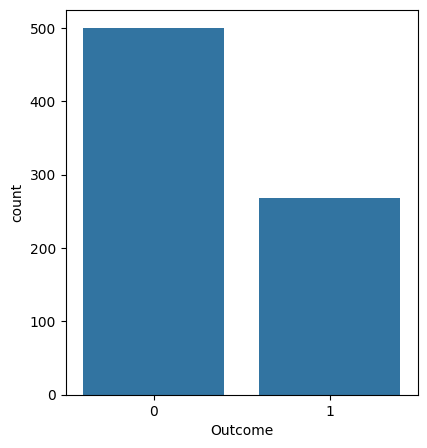

In [12]:
#count plot for outcome  
plt.figure(figsize = (10,5))
plt.subplot(1,2,2)
sns.countplot(x = 'Outcome', data = data)
plt.show()

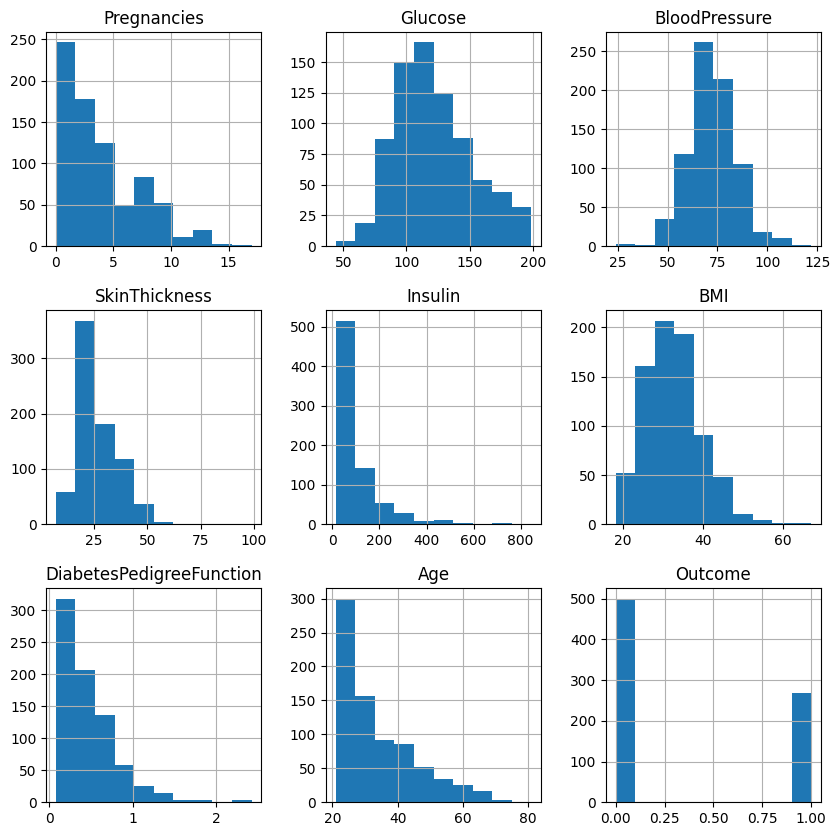

In [13]:
#histogram for each feature 
data.hist(bins=10,figsize=(10,10))
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

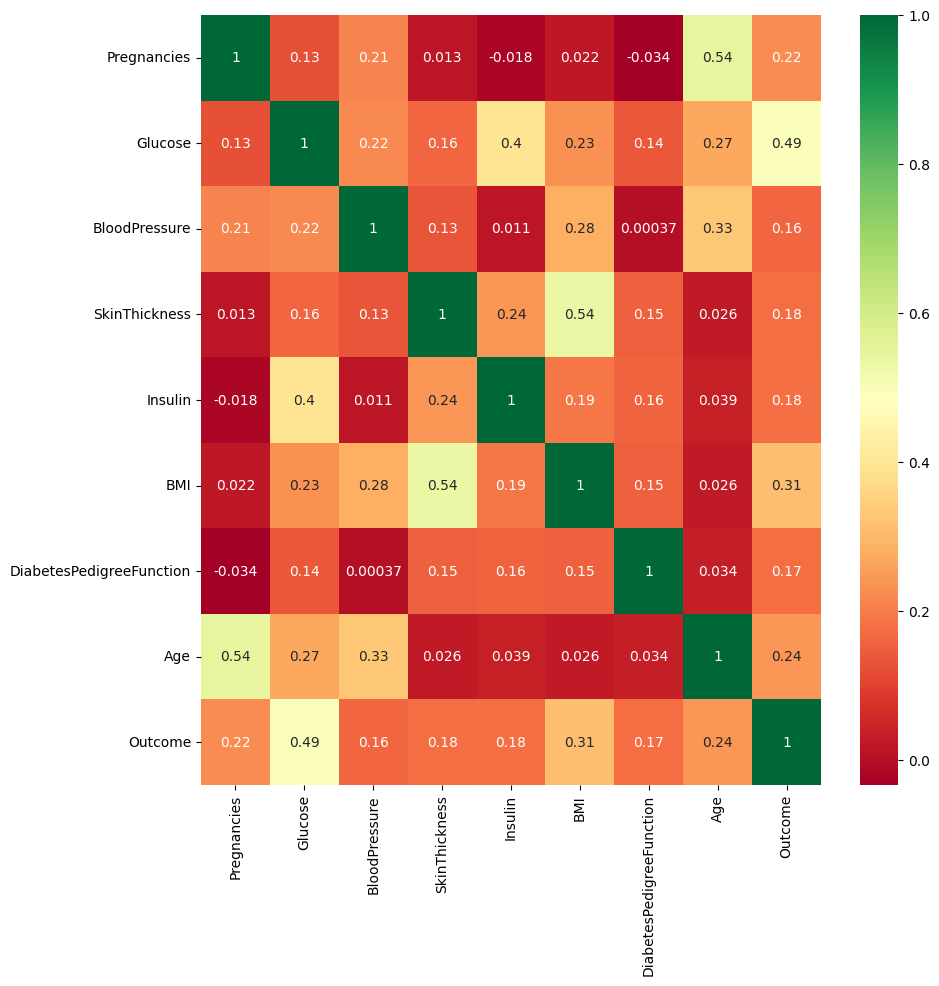

In [14]:
#carry out correlation for each features of dataset
corfea=data.corr()
print(corfea)

top_corfea=corfea.index
plt.figure(figsize=(10,10))
#plot heatmap
g=sns.heatmap(data[top_corfea].corr(),annot=True,cmap="RdYlGn")

Split data into X and Y

In [15]:
#split into input and output
target_name='Outcome'
y = data[target_name]
X = data.drop(target_name, axis=1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


Train Test Split

In [16]:
#split into train test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [17]:
X_train.shape

(614, 8)

In [18]:
X_test.shape

(154, 8)

Building Random Forest model with Recursive Feature Elimination

In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# select 1 to know the ranking
model=RandomForestClassifier(random_state=12345)
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)

from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)


1 Glucose
2 BMI
3 DiabetesPedigreeFunction
4 Age
5 BloodPressure
6 Insulin
7 Pregnancies
8 SkinThickness


In [20]:
#Building the model with selecting 6 feature
rfe = RFE(estimator=model, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [21]:
#features selected
features = list(X_train.columns[(rfe.get_support())])
print(features)

['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Build Random Forest

In [22]:
Rf = RandomForestClassifier(n_estimators = 15,
                            random_state = 20)
Rf.fit(X_train,y_train)
Rfe_train_pred = Rf.predict(X_train)
Rfe_test_pred = Rf.predict(X_test)

Evaluation of model

In [23]:
#Accuracy of Model
from sklearn.metrics import accuracy_score
print("Accuracy of model is {:.2f}".format(accuracy_score(y_test, Rfe_test_pred)))


Accuracy of model is 0.81


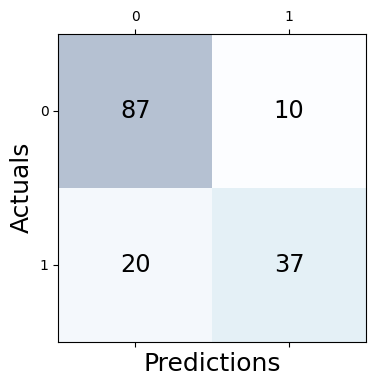

In [24]:
#confusion matrix
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, Rfe_test_pred)
fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

In [25]:
#Out of all the positive cases, how many have been predicted correctly
TP=confusion[1,1] 
TN=confusion[0,0] 
FP=confusion[0,1]
FN=confusion[1,0] 

Sensitivity_recall = metrics.recall_score(y_test, Rfe_test_pred)
print("Sensitivity (recall) is {:.2f}".format(Sensitivity_recall))

Sensitivity (recall) is 0.65


In [26]:
#Out of all the negative (normal) cases, how many have been predicted correctly
Specificity = metrics.recall_score(y_test, Rfe_test_pred,pos_label=0)
print("Specificity is {:.2f}".format(Specificity))

Specificity is 0.90


In [27]:
#f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, Rfe_test_pred)
print("F1 score is {:.2f}".format(f1))

F1 score is 0.71


Hyperparameter Optimization

In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500, 1000],
    'random_state' :[0]
}
# Create a based model
rf_model_classification = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_model_classificaiton = GridSearchCV(estimator = rf_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [29]:
grid_search_rf_model_classificaiton.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [0]},
             verbose=2)

In [30]:
y_rf_classification_pred = grid_search_rf_model_classificaiton.predict(X_test)

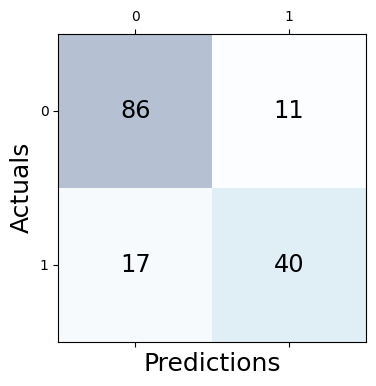

In [31]:
#confusion matrix
from sklearn import metrics
confusion=metrics.confusion_matrix(y_test, y_rf_classification_pred)
fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()

In [32]:
#Accuracy of Model
from sklearn.metrics import accuracy_score
print("Accuracy of model is {:.2f}".format(accuracy_score(y_test,y_rf_classification_pred )))


Accuracy of model is 0.82


In [33]:
#Out of all the positive cases, how many have been predicted correctly
TP=confusion[1,1] 
TN=confusion[0,0] 
FP=confusion[0,1]
FN=confusion[1,0] 

Sensitivity_recall = metrics.recall_score(y_test, y_rf_classification_pred)
print("Sensitivity (recall) is {:.2f}".format(Sensitivity_recall))

Sensitivity (recall) is 0.70


In [34]:
#Out of all the negative (normal) cases, how many have been predicted correctly
Specificity = metrics.recall_score(y_test, y_rf_classification_pred,pos_label=0)
print("Specificity is {:.2f}".format(Specificity))

Specificity is 0.89


In [35]:
f1_score = metrics.f1_score(y_test, y_rf_classification_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

F1 score: 0.80
